### Exercises

1\. Briefly describe in writing how kNN algorithm works

2\. Describe how to deal with ties when more then one class appear in the neighborhood with identical frequencies.

3\. Describe in writing how a number of neighbors $k$ influences the kNN model.

Алгоритм сохраняет все доступные помеченные точки данных в наборе обучающих данных. Далее решается задача классификации: для каждой новой точки данных алгоритм вычисляет расстояние (евклидово в N-мерном пространстве, как это было в задачах секции 9) до всех точек в наборе.
Затем он определяет k ближайших точек к новой точке на основе вычисленных расстояний. Алгоритм определяет класс большинства среди этих k соседей и назначает этот класс новой точке данных в качестве ее прогнозируемого класса. Выбор k (количества рассматриваемых соседей) влияет на производительность модели. Более низкое значение k может привести к переобучению, а более высокое значение k может привести к тому, что модель будет игнорировать закономерности.
Если внутри одной окрестности сразу несколько классов имеют одинаковые частоты, есть несколько вариантов решения этой проблемы: можно позворить "выиграть" самому простому соседу (этот подход предполагает предоставление приоритета конкретному классу, что позволяет ближайшему соседу разорвать связь), либо можно присвоить соседям численные веса, принимающие значения в зависимости от расстояния.



### Exercises

4\. Describe in writing how the confusion matrix is computed in multi-class classification


7\. Download dataset from file "point-clouds-3.csv" that can be found in the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". This file contains labeled data. Inspect the data and find the size of the dataset, number of classes, number of instances of each class. Is this dataset well balanced? Using scikit-learn library, create kNN classifier for it. Evaluate the model using an appropriate metrics. Try different $k$, find the best one. Compute the final score for your model.

8\. Download dataset from file "point-clouds-4.csv" that can be found in the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". This file contains two-column data. Create a scatter plot for it. Then create a kNN regression model for this data using different $k$. What do you think, why the models do not work properly? What can be done with the data to create better regression models?

4. Пусть в задаче классификации имеется N классов. Confusion matrix представляет собой матрицу размера N x N, где каждая строка представляет экземпляры фактического класса, а каждый столбец представляет экземпляры прогнозируемого класса. Чтобы заполнить матрицу, каждая точка данных в тестовом наборе классифицируется, далее записывается количество правильных и неправильных классификаций для каждого класса. Для данного i-го класса:
диагональный элемент (i, i) матрицы представляет количество экземпляров класса i, которые были правильно классифицированы.
Недиагональные элементы (i, j), где j не равно i, представляют экземпляры класса i, которые были классифицированы как класс j.

In [39]:
import csv
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


def load_csv_dataset(file_name, dtype=float):
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200

    reader = csv.reader(web_data.text.splitlines(), delimiter=',')
    data = []
    for row in reader:
        try:
            # Try to parse as a row of floats
            float_row = [dtype(x) for x in row]
            data.append(float_row)
        except ValueError:
            data.append(row)

    return data


data = load_csv_dataset('point-clouds-3.csv')
features = [row[:-1] for row in data[1:]]
labels = [row[-1] for row in data[1:]]

X = np.array(features, dtype=float)
y = np.array(labels)

num_instances = len(X)
num_classes = len(np.unique(y))
class_counts = {label: list(y).count(label) for label in np.unique(y)}

print(f'Size of the dataset: {num_instances}')
print(f'Number of classes: {num_classes}')
print(f'Number of instances of each class: {class_counts}')

class_counts_values = list(class_counts.values())
is_balanced = all(count == class_counts_values[0] for count in class_counts_values)

print('The dataset is well balanced.' if is_balanced else 'The dataset is not well balanced.')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 100)
best_accuracy, best_k = 0, 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Best k value: {best_k}, Best Accuracy: {best_accuracy}')

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

final_score = accuracy_score(y_test, y_pred_best)
print(f"Final Score for the model: {final_score}")

Size of the dataset: 200
Number of classes: 2
Number of instances of each class: {0.0: 150, 1.0: 50}
The dataset is not well balanced.
Best k value: 1, Best Accuracy: 0.925
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        30
         1.0       1.00      0.70      0.82        10

    accuracy                           0.93        40
   macro avg       0.95      0.85      0.89        40
weighted avg       0.93      0.93      0.92        40

Final Score for the model: 0.925


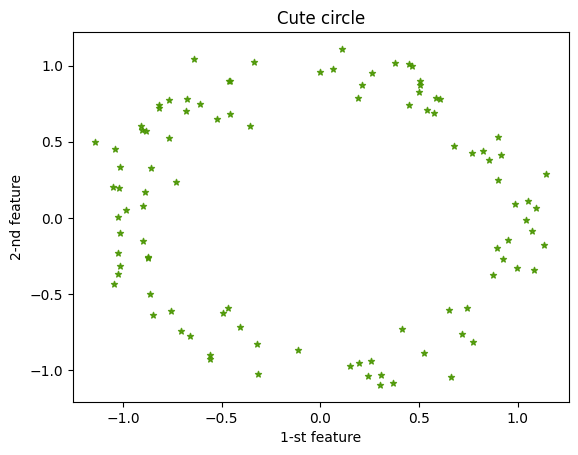

k = 3, MSE = 0.5681
k = 5, MSE = 0.5203
k = 7, MSE = 0.572
k = 9, MSE = 0.5017
k = 11, MSE = 0.4711
k = 13, MSE = 0.481
k = 15, MSE = 0.4656
k = 17, MSE = 0.4846
k = 19, MSE = 0.5122

Outliers can significantly influence the performance of kNN regression models, impacting the smoothness of the regression curve.
On the other hand, if the features don’t have a meaningful relationship with the target variable, the model may struggle to capture the underlying patterns effectively.

But I think the main problem here is distances on the circle, since kNN relies on distance metrics.
It looks like more points are needed to improve the model.


In [75]:
import csv
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def load_csv_dataset(file_name, dtype=float):
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200

    reader = csv.reader(web_data.text.splitlines(), delimiter=',')
    data = []
    for row in reader:
        try:
            # Try to parse as a row of floats
            float_row = [dtype(x) for x in row]
            data.append(float_row)
        except ValueError:
            data.append(row)

    return data


data = load_csv_dataset('point-clouds-4.csv')
features = [row for row in data[1:]]
X = np.array(features)[:, 0]
y = np.array(features)[:, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y, s=20, color='#499500', alpha=0.87, marker='*')
ax.set_xlabel('1-st feature', fontsize=10)
ax.set_ylabel('2-nd feature', fontsize=10)
ax.set_title('Cute circle')
plt.show()

X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(3, 20, 2)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'k = {k}, MSE = {np.round(mse, 4)}')

print('\nOutliers can significantly influence the performance of kNN regression models, impacting the smoothness of the regression curve.')
print('On the other hand, if the features don’t have a meaningful relationship with the target variable, the model may struggle to capture the underlying patterns effectively.')
print('\nBut I think the main problem here is distances on the circle, since kNN relies on distance metrics.')
print('It looks like more points are needed to improve the model.')